Week 4 (MLP)

Polynomial Regression

In [3]:
#Polynomial Regression with normal euation
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
wine_data_copy = wine_data.copy()
label = wine_data['quality']
wine_data = wine_data.drop(['quality'], axis = 1)
print("Before shape", wine_data.shape)

poly_model = Pipeline([
                       ('polynomial_transform', PolynomialFeatures(degree = 2)),
                       ('linear_regression', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(wine_data,label,random_state = 0)

poly_model.fit(X_train, y_train)

Before shape (1599, 11)


Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [4]:
#Polynomial Regression with SGD
from sklearn.linear_model import SGDRegressor

poly_model2 = Pipeline([
                       ('polynomial_transform', PolynomialFeatures(degree = 2)),
                       ('sgd_regression', SGDRegressor())
])

X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_data,label,random_state = 0)

poly_model2.fit(X_train2, y_train2)

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('sgd_regression', SGDRegressor())])

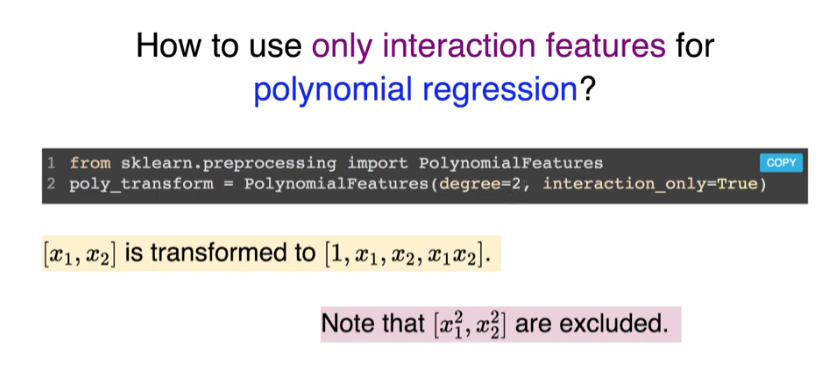

Source: IITM

Regularization

In [6]:
#Ridge Regularization with specific regularization rate

#Option 1 Ridge estimator
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1e-3)

#Option 2 SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha = 1e-3, penalty = 'l2')   #alpha - regularization rate


In [8]:
#Best Regularization parameter for ridge

#Option 1: built in CV in RidgeCV

#Option 2: CV with Ridge or SVDRegressor:
#                           Grid search / Randomized search for searching alpha

In [9]:
#Ridge regularization in Polynomial Regression

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model3 = Pipeline([
                       ('polynomial_transform', PolynomialFeatures(degree = 2)),
                       ('ridge', Ridge(alpha = 1e-3)) #can also use SGDRegressor
])

poly_model3.fit(X_train, y_train)

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.001))])

In [10]:
#Lasso regularization

#Option 1:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1e-3)

#Option 2:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha = 1e-3, penalty = 'l1')

In [11]:
#Best Regularization parameter for lasso

#Option 1: built in CV in LassoCV

#Option 2: CV with Lasso or SVDRegressor:
#                           Grid search / Randomized search for searching alpha

In [13]:
#Lasso regularization in Polynomial Regression

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model3 = Pipeline([
                       ('polynomial_transform', PolynomialFeatures(degree = 2)),
                       ('lasso', Lasso(alpha = 1e-3)) #can also use SGDRegressor
])

poly_model3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.320e+02, tolerance: 7.975e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.001))])

In [17]:
#Lasso and Ridge together

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

poly_model3 = Pipeline([
                       ('polynomial_transform', PolynomialFeatures(degree = 2)),
                       ('elasticnet',SGDRegressor(penalty = 'elasticnet',
                                                  l1_ratio = 0.3)) #elasticnet - convex combination of l1 and l2 ; here l1-0.3, l2-0.7
])

poly_model3.fit(X_train, y_train)

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('elasticnet',
                 SGDRegressor(l1_ratio=0.3, penalty='elasticnet'))])

Hyperparameter tuning

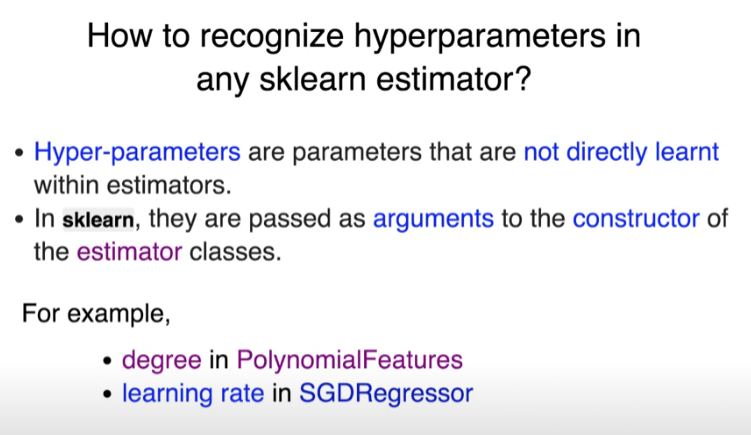

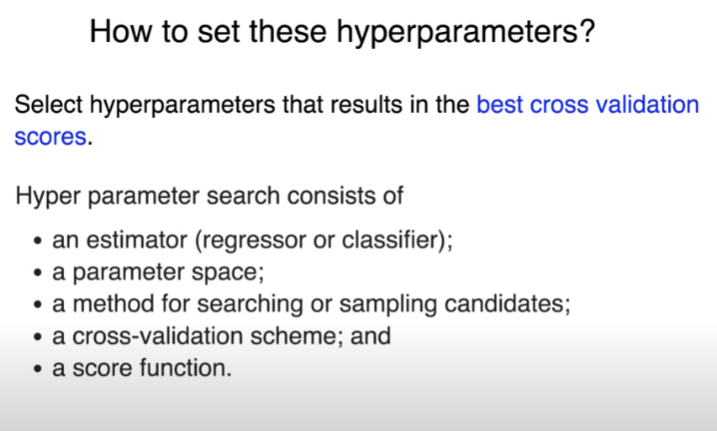

Source: IITM

In [21]:
# 2 generic HPT

#GridSearchCV - specifies exact values of parameters in grid

param_grid = [
              { 'C': [1,10,100,1000], 'kernel':['linear'] }
]

#RandomizedSearchCV - specifies distribution

from scipy import stats
from scipy.stats import loguniform

param_dist = {
    "average": [True, False],   #distribution - True false
    "l1_ratio": stats.uniform(0,1),   #distribution - uniform distribution with range(0,1)
    "alpha": loguniform(1e-4, 1e0),   #distribution - loguniform
}

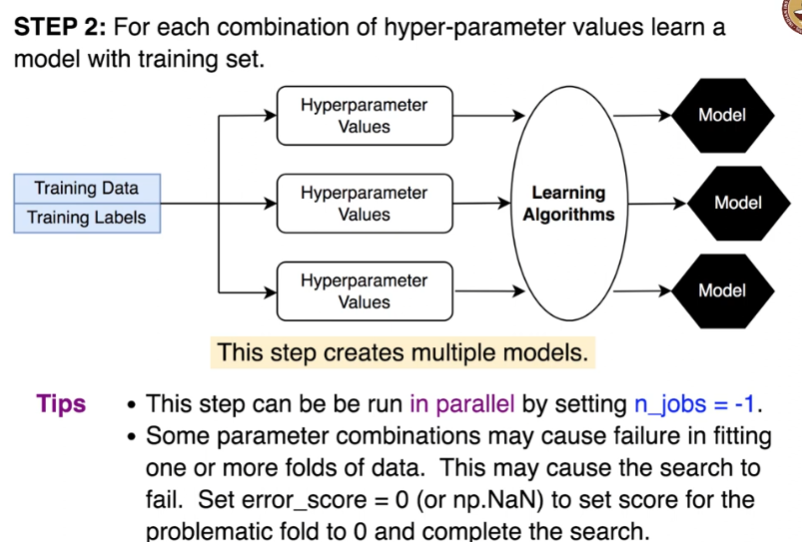
Source: IITM

Evaluate performance of each model with validation set and select model with the best evaluation score

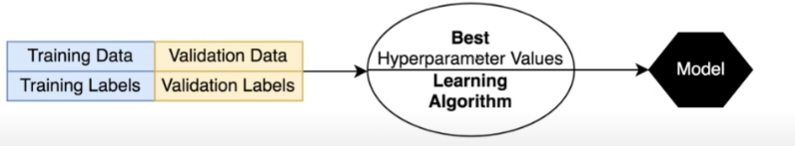

Source:IITM

In [ ]:
#determine degree of polynomial regresison

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

param_grid = [
              {'poly_degree': [2,3,4,5,6,7,8,9]}
]

pipeline = Pipeline(steps = [('poly', PolynomialFeatures()),
                             ('sgd', SGDRegressor())])

grid_search = GridSearchCV(pipeline, param_grid, cv = 5,
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True)

grid_search.fit(X_train.reshape(-1,1), y_train)